In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/winequality-red.csv')

Mounted at /content/drive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
bins = (2,5,8)
group_names = ['bad','good']
categories = pd.cut(df['quality'], bins, labels = group_names)
df['quality'] = categories

In [8]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [9]:
accuracy_list = {"SVM": None, "Logistic Regression": None, "Random Forest": None, "Neural Networks": None}

In [10]:
X = df.drop(['quality'], axis = 1) 
y = df['quality']
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

**SVM**

Accuracy:  0.7625
Precision for svm  0.7625
Recall for svm  0.7625


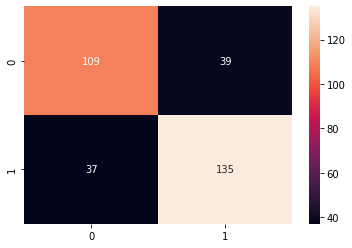

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0) ## RBF- Radial Basis Function 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
accuracy_list["SVM"] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print("Precision for svm ",precision_score(y_test,y_pred,average='micro'))
print("Recall for svm ",recall_score(y_test,y_pred,average='micro'))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

**Logistic Regression**

Accuracy = 0.7729166666666667
Precision for Logistic Regression  0.7625
Recall for Logistic regression  0.7625


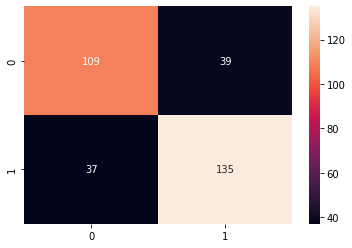

In [13]:


X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30, shuffle=True)

scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)


regressor=LogisticRegression(solver='saga', multi_class='multinomial',max_iter=1000) ## SAGA- varient of Stochastic Average Gradient good for large datasets 
regressor.fit(X_train,Y_train)

score=regressor.score(X_test,Y_test)
print('Accuracy = '+str(score))
accuracy_list["Logistic Regression"] = score
print("Precision for Logistic Regression ",precision_score(y_test,y_pred,average='micro')) ## Micro -Calculate metrics globally by counting the total TP, FN and FP
print("Recall for Logistic regression ",recall_score(y_test,y_pred,average='micro'))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

**Random Forest**

Accuracy:  0.821875
Precision for Random forest  0.821875
Recall for Random forest  0.821875


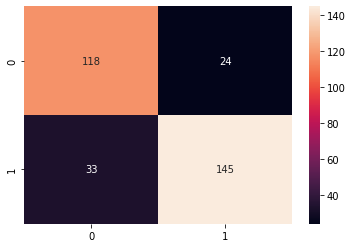

In [14]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/winequality-red.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))
accuracy_list["Random Forest"] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print("Precision for Random forest ",precision_score(y_test,y_pred,average='micro'))
print("Recall for Random forest ",recall_score(y_test,y_pred,average='micro'))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

**Neural Networks**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy:  0.746875
Precision for neural networks  0.746875
Recall for neural networks  0.746875


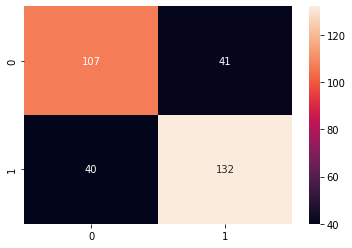

In [15]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/winequality-red.csv')
bins = (2,5,8)
group_names = ['bad','good']
categories = pd.cut(df['quality'], bins, labels = group_names) 
df['quality'] = categories
X = df.drop(['quality'], axis = 1) 
y = df.pop("quality")
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',       ## lbfgs - approximates the second derivative matrix updates other available are newton-cg , liblinear etc
                    alpha=1e-5,           ## alpha - To control possible 'overfitting' and 'underfitting'
                    hidden_layer_sizes=(70,), 
                    random_state=1)

clf.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))
accuracy_list["Neural Networks"] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print("Precision for neural networks ",precision_score(y_test,y_pred,average='micro'))
print("Recall for neural networks ",recall_score(y_test,y_pred,average='micro'))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')


**Comparing the accuracies for all the above algorithms**

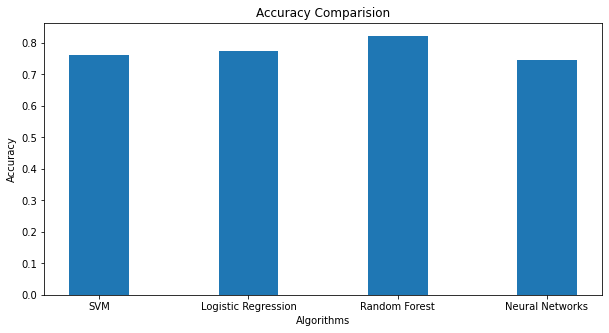

{'SVM': 0.7625, 'Logistic Regression': 0.7729166666666667, 'Random Forest': 0.821875, 'Neural Networks': 0.746875}


In [16]:
fig = plt.figure(figsize = (10, 5))
plt.bar(accuracy_list.keys(), accuracy_list.values(), width = 0.4)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparision')
plt.show()
print(accuracy_list)

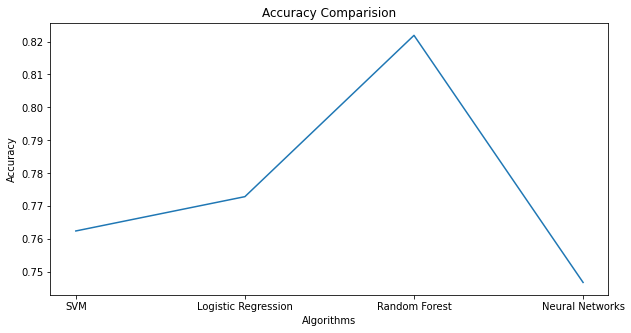

{'SVM': 0.7625, 'Logistic Regression': 0.7729166666666667, 'Random Forest': 0.821875, 'Neural Networks': 0.746875}


In [17]:
fig = plt.figure(figsize = (10, 5))
plt.plot(list(accuracy_list.keys()), list(accuracy_list.values()))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparision')
plt.show()
print(accuracy_list)